In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Read input marks as CSV file

In [2]:
marks = pd.read_csv('marksDIP.csv', delimiter = ",")
marks['Mid'] = (marks['End']/40.0) * 20

In [3]:
marks.head(12)

,Roll,Mid,End
0,BT/08,5.5,11
1,BT/15,16.0,32
2,CO/17,14.0,28
3,CO/57,3.0,6
4,CO/77,17.5,35
5,CO/87,16.0,32
6,CO/102,19.0,38
7,CO/110,13.5,27
8,CO/140,18.0,36
9,CO/141,16.0,32


In [4]:
marks.loc[marks['Roll'] == 'CO/140', 'Mid'] = 19
marks.loc[marks['Roll'] == 'CO/143', 'Mid'] = 9
marks.head(12)

,Roll,Mid,End
0,BT/08,5.5,11
1,BT/15,16.0,32
2,CO/17,14.0,28
3,CO/57,3.0,6
4,CO/77,17.5,35
5,CO/87,16.0,32
6,CO/102,19.0,38
7,CO/110,13.5,27
8,CO/140,19.0,36
9,CO/141,16.0,32


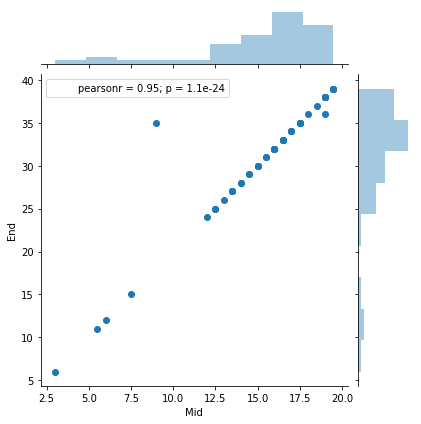

In [5]:
sns.jointplot(x = 'Mid', y = 'End', data = marks)

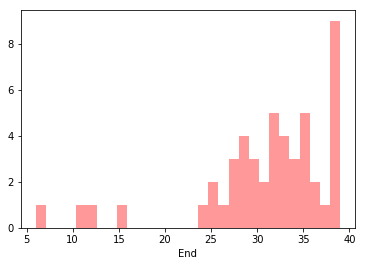

In [6]:
sns.distplot(marks['End'],bins=30,kde=False,color='red')

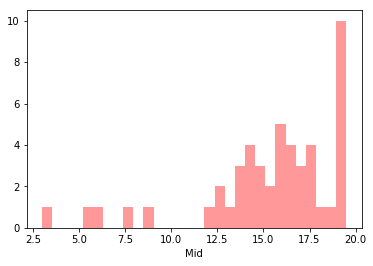

In [7]:
sns.distplot(marks['Mid'],bins=30,kde=False,color='red')

In [8]:
#Calculate total marks, Mean, Standard Deviation
marks['Total'] = marks['Mid'] + marks['End']
marks['Mean'] = np.mean(marks['Total'])
marks['SD'] = np.sqrt(np.mean(abs(marks['Total'] - marks['Mean'])**2))

#Calculate Z = (Total-Mean)/SD
marks['Z'] = ((marks['Total'] - marks['Mean'])/marks['SD'])

In [9]:
marks.head(5)

,Roll,Mid,End,Total,Mean,SD,Z
0,BT/08,5.5,11,16.5,46.22449,10.867974,-2.735053
1,BT/15,16.0,32,48.0,46.22449,10.867974,0.163371
2,CO/17,14.0,28,42.0,46.22449,10.867974,-0.388710
3,CO/57,3.0,6,9.0,46.22449,10.867974,-3.425154
4,CO/77,17.5,35,52.5,46.22449,10.867974,0.577431


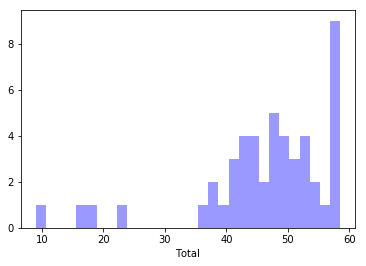

In [10]:
sns.distplot(marks['Total'],bins=30,kde=False,color='blue')

# Mapping Z-score to the grade values

In [11]:
Low_Z = [1.5, 1.0, 0.5, 0.0 , -0.5, -1.0, -1.5, -100]
Upp_Z = [100, 1.5, 1.0, 0.5, 0.0, -0.5, -1.0, -1.5]
Grade = [10, 9, 8, 7, 6, 5, 4, 0]

Points = []

for index, row in marks.iterrows():
    for i in xrange(0, 8):
        if row['Z'] <= Upp_Z[i] and row['Z'] > Low_Z[i]:
            Points.append(Grade[i])
            break

marks['G'] = Points
marks.to_csv('gradesDIP.csv', sep = ',', index = False)

In [12]:
marks.head(5)

,Roll,Mid,End,Total,Mean,SD,Z,G
0,BT/08,5.5,11,16.5,46.22449,10.867974,-2.735053,0
1,BT/15,16.0,32,48.0,46.22449,10.867974,0.163371,7
2,CO/17,14.0,28,42.0,46.22449,10.867974,-0.388710,6
3,CO/57,3.0,6,9.0,46.22449,10.867974,-3.425154,0
4,CO/77,17.5,35,52.5,46.22449,10.867974,0.577431,8


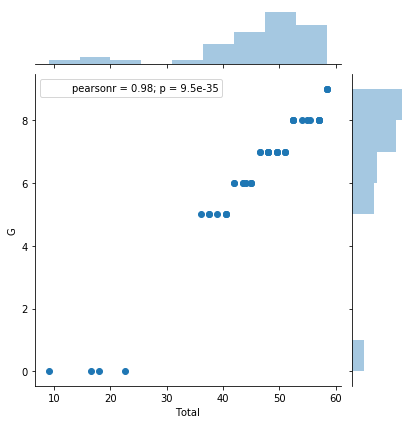

In [13]:
#Plot Grades with total marks
sns.jointplot(x = 'Total', y = 'G', data = marks)

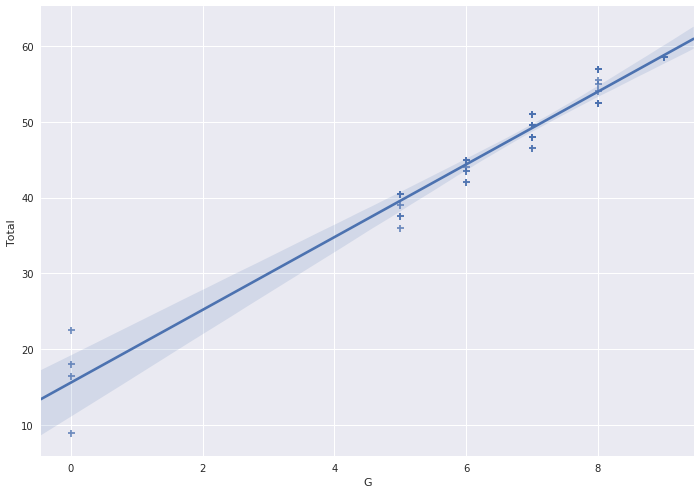

In [14]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.regplot(x="G", y="Total", data=marks, marker = '+')